# 📈 Data Frequency and Timing Analysis from CSV
This notebook analyzes the timing consistency of logged data using timestamps from a `Millis` column in a CSV file.

We explore:
- 📊 The **instantaneous frequency** of data reception.
- ⏱️ The **time difference** (`Δt`) between consecutive samples.
- 📌 Basic **descriptive statistics** on frequency distribution.


> Units:
- Time difference is measured in **milliseconds (ms)**.
- Frequency is measured in **hertz (Hz)**.

---

📍 **Run this notebook on Google Colab**:  
👉 [Open in Colab](https://colab.research.google.com/drive/1u3gON0EEDnfnLpLB_TXoAjIaJn2-LgkI?usp=sharing)

---

💡 *Feel free to contribute suggestions or improvements! Your feedback is always welcome 😊*


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload your CSV file
uploaded = files.upload()

# Automatically detect the uploaded file name
filename = next(iter(uploaded))

Saving sensor_data_2025-04-24_10-17-46.csv to sensor_data_2025-04-24_10-17-46.csv


## ⏱️ Step 1: Calculate Time Differences and Frequencies

We compute:
- `Delta_t` = time difference between rows (in milliseconds)
- `Frequency_Hz` = 1000 / `Delta_t`

This shows how frequently the data was received at each sample point.


In [9]:
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Calculate Δt between entries
df['Delta_t'] = df['Millis'].diff()

# Calculate frequency: f = 1000 / Δt (in Hz)
df['Frequency_Hz'] = 1000 / df['Delta_t']


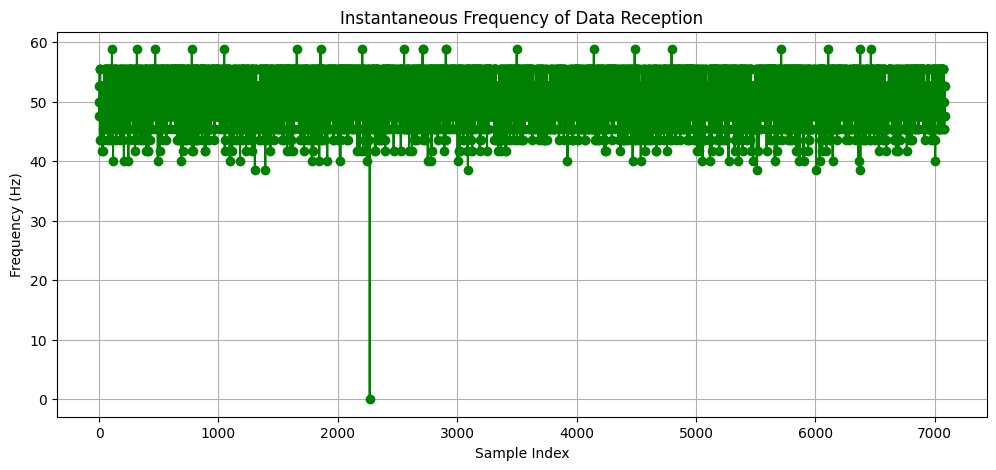

In [14]:
# Plot frequency
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Frequency_Hz'], marker='o', linestyle='-', color='green')
plt.title('Instantaneous Frequency of Data Reception')
plt.xlabel('Sample Index')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()

## 🔍 Step 3: Plot Time Difference (Δt) Between Data Points

This reveals irregularities or spikes in sampling delay.

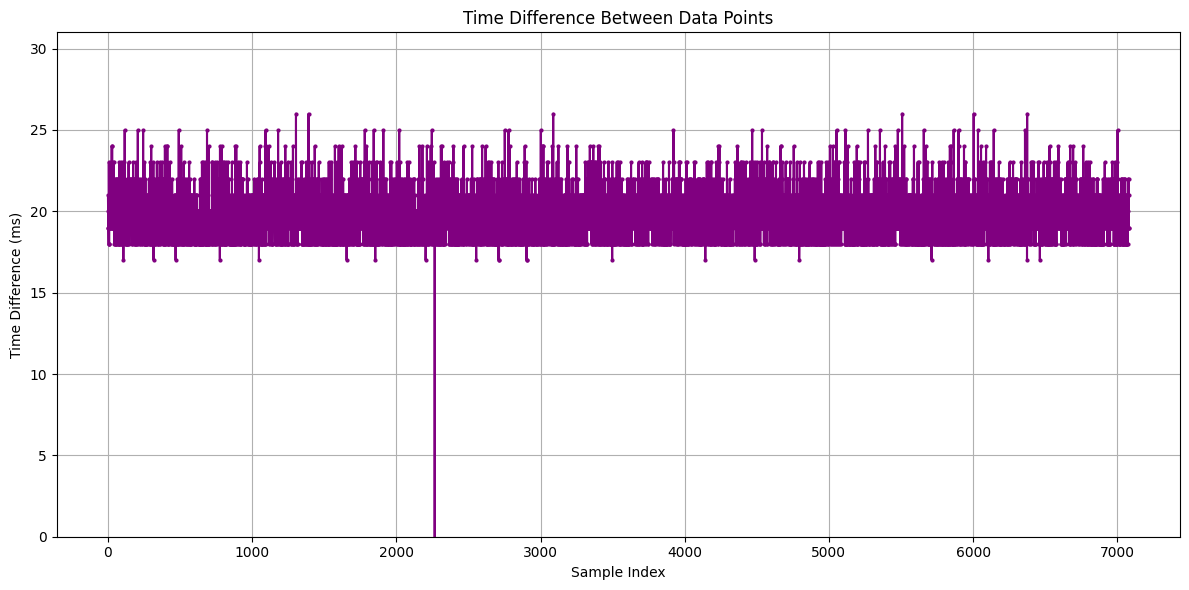

In [21]:
# Drop the first row (diff creates NaN)
df = df.dropna().reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Delta_t'], color='purple', marker='o', linestyle='-', markersize=2)

# Set plot labels and title
plt.title('Time Difference Between Data Points')
plt.xlabel('Sample Index')
plt.ylabel('Time Difference (ms)')
plt.ylim(0, df['Delta_t'].max() + 5)  # Y-axis from 0 to max delta + small margin
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Step 4: Frequency Statistics

Get a quick overview of the frequency distribution.

In [15]:
# Optionally show basic stats
print("Time Difference Statistics:")
print(df['Frequency_Hz'].describe())

Time Difference Statistics:
count    7082.000000
mean       50.743194
std         3.654316
min        -0.022124
25%        47.619048
50%        50.000000
75%        52.631579
max        58.823529
Name: Frequency_Hz, dtype: float64


Run on google: https://colab.research.google.com/drive/1u3gON0EEDnfnLpLB_TXoAjIaJn2-LgkI?usp=sharing